In [1]:
import matplotlib.pyplot as plt
import numpy as np

First we need to make a choice how many samples to use to create our sine. Arduino's `analogWrite()` takes integers in the range from 0 to 255. The larger the sample size, the _smoother_ will our integer sine be. I chose 500 -- this seems to be plenty. Then we use numpy's `linspace` and `sin` to generate a sine, with 500 points spaced evenly between 0 and 2$\pi$. Note that I don't include the endpoint because we'll loop through this signal over and over again, so want the start value only once.

In [2]:
# number of samples
n = 500

# generate a sine from 0 to 2*pi, last point excluded
sine = np.sin(np.linspace(0, 2 * np.pi, n, endpoint=False))

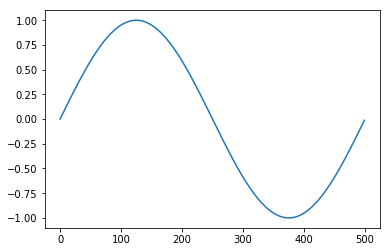

In [3]:
plt.plot(sine)

First scale from `[-1, 1]` to `[0, 1]`, then to `[0, 255]`, finally round and cast to integers. This is going to be our signal for PWMA. The signal for PWMB is just 255 (max signal value) minust signal for PWMA.

In [4]:
signalA = np.array([int(round(s)) for s in 255 * (0.5 * (1 - sine))])
signalB = 255 - signalA

`signalA` is what we'll hardcode in our Arduino code. Here are the actual values:

In [5]:
signalA

array([128, 126, 124, 123, 121, 119, 118, 116, 115, 113, 112, 110, 108,
       107, 105, 104, 102, 100,  99,  97,  96,  94,  93,  91,  90,  88,
        87,  85,  84,  82,  81,  79,  78,  76,  75,  73,  72,  70,  69,
        67,  66,  65,  63,  62,  61,  59,  58,  56,  55,  54,  53,  51,
        50,  49,  47,  46,  45,  44,  43,  41,  40,  39,  38,  37,  36,
        35,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,  23,  22,
        22,  21,  20,  19,  18,  17,  17,  16,  15,  14,  14,  13,  12,
        11,  11,  10,  10,   9,   8,   8,   7,   7,   6,   6,   5,   5,
         4,   4,   4,   3,   3,   3,   2,   2,   2,   1,   1,   1,   1,
         1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   1,   1,   1,   1,   1,   2,   2,   2,   3,   3,
         3,   4,   4,   4,   5,   5,   6,   6,   7,   7,   8,   8,   9,
        10,  10,  11,  11,  12,  13,  14,  14,  15,  16,  17,  17,  18,
        19,  20,  21,  22,  22,  23,  24,  25,  26,  27,  28,  2

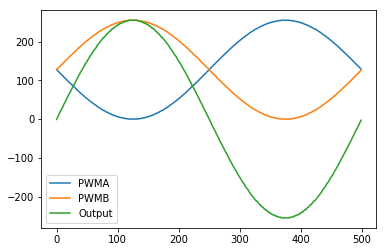

In [6]:
plt.plot(signalA, label='PWMA')
plt.plot(signalB, label='PWMB')
plt.plot(signalB - signalA, label='Output')
plt.legend()

And this is it. If we `analogWrite()` the blue curve to PWMA, and the orange curve to PWMB, the motor will be forced with a sine in the range `[-255, 255]`. For a 12V battery or power supply, this will correspond to forcing the motor with a sine in the range `[-12, 12]` V.

Finally, make sure that our output signal integrates to zero. This is important and not guaranteed because of the limited number of samples and rounding to integers. If positive, this means that the actuator will extend slightly more than it retracts in every oscillation. If negative, it will retract a little bit more than extend.

In [7]:
assert np.sum(signalB - signalA) == 0, 'Signal does not integrate to zero'